# K-means Clustering

In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

# EDA

In [15]:
data = pd.read_csv('crime_data.csv')
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [16]:
data.rename(columns ={"Unnamed: 0":"State"},inplace= True)
data.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [12]:
data.isna().sum()

State       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [19]:
data[data.duplicated()]

,State,Murder,Assault,UrbanPop,Rape


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

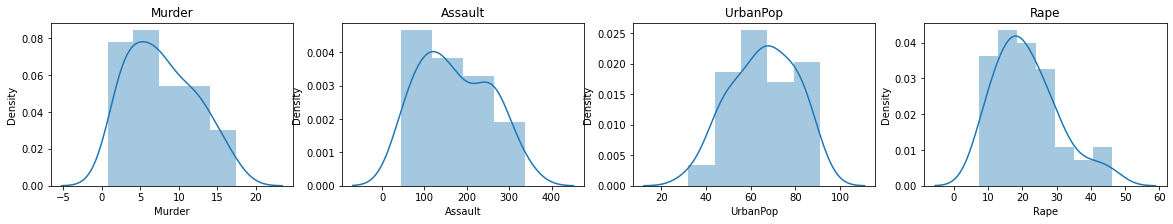

In [20]:
from matplotlib.pyplot import figure
fig, ax =plt.subplots(1,4,figsize=(20,3))
sns.distplot(data['Murder'],ax=ax[0])
sns.distplot(data['Assault'],ax=ax[1])
sns.distplot(data['UrbanPop'],ax=ax[2])
sns.distplot(data['Rape'],ax=ax[3])
ax[0].set_title("Murder")
ax[1].set_title("Assault")
ax[2].set_title("UrbanPop")
ax[3].set_title("Rape")
fig.show()

In [21]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.iloc[:,1:])

In [25]:
scaled_data

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

# finding optimum number of clusters

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


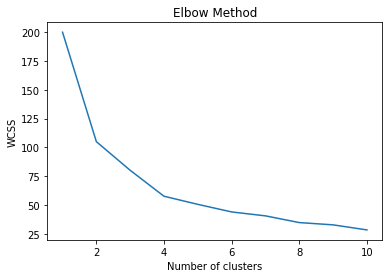

In [27]:
wcss =[]
for i in range(1,11):
    kmeans=KMeans(n_clusters = i,random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [39]:
#building cluster algorithm
clusters_new = KMeans(4,random_state=60)
clusters_new.fit(scaled_data)

KMeans(n_clusters=4, random_state=60)

In [40]:
clusters_new.labels_

array([0, 2, 2, 0, 2, 2, 3, 3, 2, 0, 3, 1, 2, 3, 1, 3, 1, 0, 1, 2, 3, 2,
       1, 0, 2, 1, 1, 2, 1, 3, 2, 2, 0, 1, 3, 3, 3, 3, 3, 0, 1, 0, 2, 3,
       1, 3, 3, 1, 1, 3])

In [42]:
#Assign clusters to data set
data['Clusters'] = clusters_new.labels_
data

,State,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,3
7,Delaware,5.9,238,72,15.8,3
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


In [43]:
#these are standardized values.
clusters_new.cluster_centers_

array([[ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.49440658, -0.3864845 ,  0.58167593, -0.26431024]])

In [44]:
data.groupby('Clusters').agg(['mean']).reset_index()

,Clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,13.937500,243.625000,53.750000,21.412500
1,1,3.600000,78.538462,52.076923,12.176923
2,2,10.815385,257.384615,76.000000,33.192308
3,3,5.656250,138.875000,73.875000,18.781250


In [45]:
data.sort_values(by=['Clusters'])


,State,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,0
3,Arkansas,8.8,190,50,19.5,0
41,Tennessee,13.2,188,59,26.9,0
39,South Carolina,14.4,279,48,22.5,0
17,Louisiana,15.4,249,66,22.2,0
9,Georgia,17.4,211,60,25.8,0
32,North Carolina,13.0,337,45,16.1,0
23,Mississippi,16.1,259,44,17.1,0
22,Minnesota,2.7,72,66,14.9,1
25,Montana,6.0,109,53,16.4,1
